[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# DeepAR

This is a DeepAR model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models.

We used as the base the implementation of DeepAR from Pytorch Forecasting library. The model parameters are inherited automatically from the dataset structure, if from_dataset is set to True.

For more detail on hyperparameters, please follow https://github.com/jdb78/pytorch-forecasting/blob/master/pytorch_forecasting/models/nbeats/__init__.py

In [1]:
from neuralprophet import DeepAR
import pandas as pd

In [2]:
if 'google.colab' in str(get_ipython()):
    data_location = "https://raw.githubusercontent.com/adasegroup/neural_prophet/master/"
    # install NeuralProphet from our repository
    !pip install git+https://github.com/adasegroup/neural_prophet.git # may take a while
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
freq = '5min'

In [13]:
m = DeepAR(
        n_lags=12,
        n_forecasts = 1,
        batch_size = 32,
        epochs = 20,
        num_gpus = 0,
        patience_early_stopping = 10,
        early_stop = True,
        learning_rate=5e-3,
        auto_lr_find=False,
        num_workers=8,
        loss_func = 'normaldistributionloss',
        hidden_size=10,
        rnn_layers=2,
        dropout=0.1,
)

In [14]:
m.fit(df, freq = freq)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name                   | Type                   | Params
------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList             | 0     
2 | embeddings             | MultiEmbedding         | 0     
3 | rnn                    | LSTM                   | 1.4 K 
4 | distribution_projector | Linear                 | 22    
------------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,4.881815,5.336238,60.845202,3.147652,3.511357,30.851222
1,1.114910,1.501618,5.830815,1.124999,1.447319,5.487187
2,0.665479,1.012249,2.583265,0.578597,0.923825,1.878419
3,0.559598,0.899719,1.993157,0.442691,0.765784,1.424532
4,0.522468,0.860903,1.851171,0.387512,0.721267,1.194710
5,0.485764,0.818754,1.703901,0.313777,0.606583,0.812843
6,0.489449,0.821105,1.726742,0.369493,0.760413,0.986259
7,0.457659,0.783056,1.612867,0.257220,0.558254,0.697556
8,0.460195,0.785346,1.635033,0.223704,0.521939,0.557518
9,0.448010,0.772664,1.564506,0.250887,0.511399,0.702321


WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)



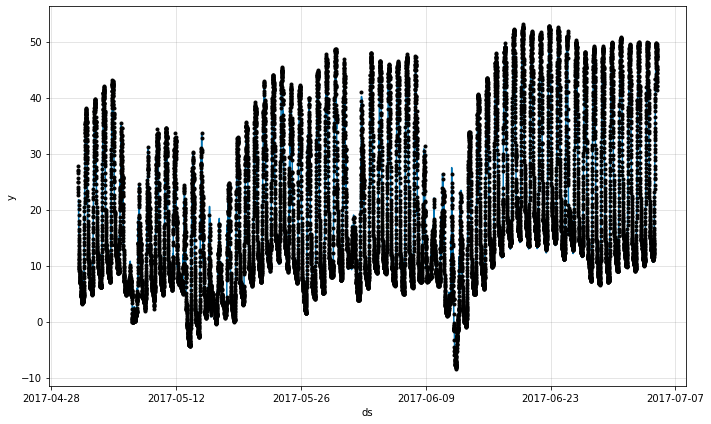

In [15]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
m = DeepAR(
        n_lags=6*12,
        n_forecasts=3*12,
        batch_size = 32,
        epochs = 20,
        patience_early_stopping = 10,
        early_stop = True,
        learning_rate=1e-3,
        auto_lr_find=False,
        hidden_size=10,
        rnn_layers=2,
        dropout=0.1,
)
metrics = m.fit(df, freq='5min')
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name                   | Type                   | Params
------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList             | 0     
2 | embeddings             | MultiEmbedding         | 0     
3 | rnn                    | LSTM                   | 1.4 K 
4 | distribution_projector | Linear                 | 22    
------------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
f = m.plot(forecast)

In [ ]:
f = m.plot(forecast[144:6*288])